In [1]:
# ==--==--== Imports ==--==--==
import os
import acquire as a
import wrangle as w
import evaluate as e
import modeling as m
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")
# Array and Dataframes
import numpy as np
import pandas as pd
# Imputer
from sklearn.impute import SimpleImputer
# Evaluation: Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Evaluation: Statistical Analysis
from scipy import stats
# Modeling: Clustering
from sklearn.cluster import KMeans
# Modeling: Scaling
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
# Modeling Feature Selection
from sklearn.feature_selection import SelectKBest
# Modeling
from sklearn.model_selection import GridSearchCV
# Metrics

In [2]:
wine = a.acquire_wine()

In [3]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [4]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [5]:
#wine = w.remove_outliers(wine,exclude_col=['is_red','quality'])

In [6]:
train, validate, test = w.splitter(wine, stratify='quality')

Dataframe: (6497, 13) 100%
Train: (4157, 13) | ~60%
Validate: (1040, 13) | ~20%
Test: (1300, 13) | ~20%


## Splitting & Scaling

In [7]:
# x train assigned
x_train = train.drop(columns='quality')
x_validate = validate.drop(columns='quality')
x_test = test.drop(columns='quality')

# y train assigned
y_train = train.quality
y_validate = validate.quality
y_test = test.quality

In [8]:
x_train_scaled, x_validate_scaled, x_test_scaled = w.QuickScale(x_train, x_validate, x_test, scaler='Robust')

x_train_scaled

array([[ 1.38461538, -0.38888889,  0.28571429, ..., -0.11764706,
        -0.66666667,  0.        ],
       [-0.92307692, -0.33333333,  0.92857143, ..., -0.47058824,
         0.77777778,  0.        ],
       [ 0.        , -0.05555556,  1.64285714, ...,  0.58823529,
        -0.44444444,  0.        ],
       ...,
       [ 1.15384615,  0.38888889,  0.07142857, ...,  1.23529412,
         0.83333333,  1.        ],
       [ 0.38461538,  1.22222222,  0.78571429, ...,  0.58823529,
         0.11111111,  1.        ],
       [-0.46153846, -0.5       ,  0.21428571, ..., -0.76470588,
         0.16666667,  0.        ]])

In [9]:
columns = x_train.columns.to_list()

x_train_scaled = pd.DataFrame(x_train_scaled, columns = columns)
x_validate_scaled = pd.DataFrame(x_validate_scaled, columns = columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = columns)

In [10]:
w.summarize_df(wine)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,dtype
12,is_red,2,"[0, 1]",0,int64
11,quality,7,"[6, 5, 7, 8, 4, 3, 9]",0,int64
2,citric_acid,89,"[0.36, 0.34, 0.4, 0.32, 0.16, 0.43, 0.41, 0.37...",0,float64
0,fixed_acidity,106,"[7.0, 6.3, 8.1, 7.2, 6.2, 8.6, 7.9, 6.6, 8.3, ...",0,float64
8,ph,108,"[3.0, 3.3, 3.26, 3.19, 3.18, 3.22, 2.99, 3.14,...",0,float64
9,sulphates,111,"[0.45, 0.49, 0.44, 0.4, 0.47, 0.56, 0.53, 0.63...",0,float64
10,alcohol,111,"[8.8, 9.5, 10.1, 9.9, 9.6, 11.0, 12.0, 9.7, 10...",0,float64
5,free_sulfur_dioxide,135,"[45.0, 14.0, 30.0, 47.0, 28.0, 11.0, 17.0, 16....",0,float64
1,volatile_acidity,187,"[0.27, 0.3, 0.28, 0.23, 0.32, 0.22, 0.18, 0.16...",0,float64
4,chlorides,214,"[0.045, 0.049, 0.05, 0.058, 0.044, 0.033, 0.03...",0,float64


In [11]:
w.summarize(wine)

=====   SHAPE   =====
(6497, 13)
=====   INFO   =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  is_red                6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None
=====   DESCRIBE

In [12]:
cat_cols, num_cols = w.organize_columns(wine)
num_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality']

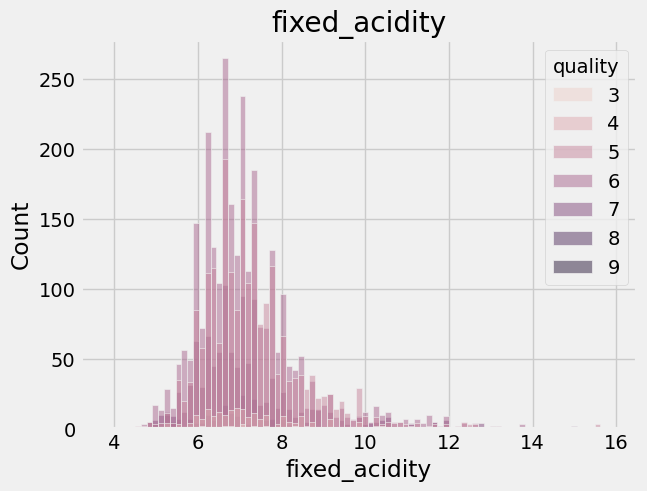

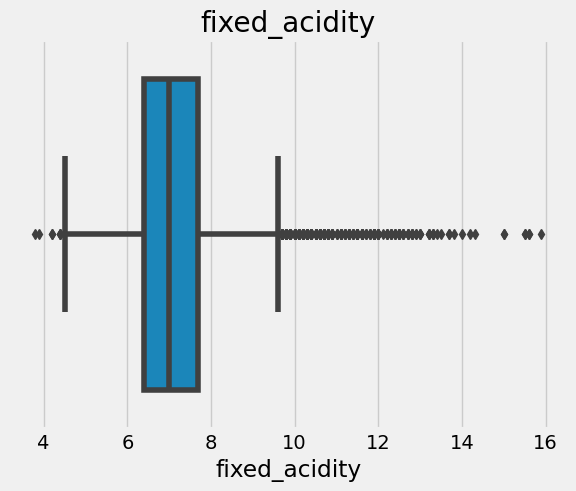

-------------------------------------------------------------


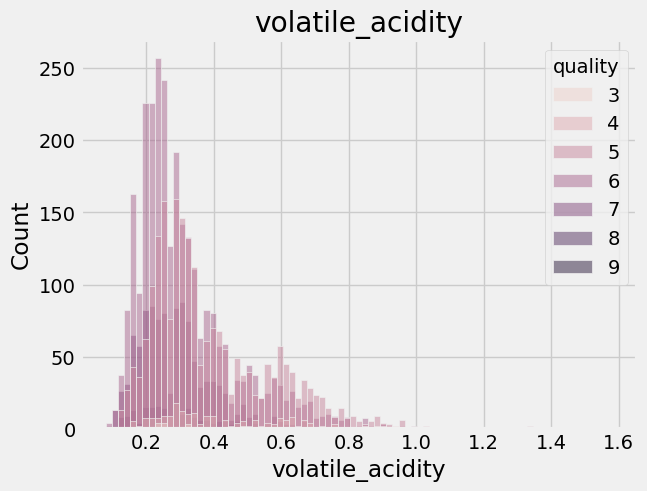

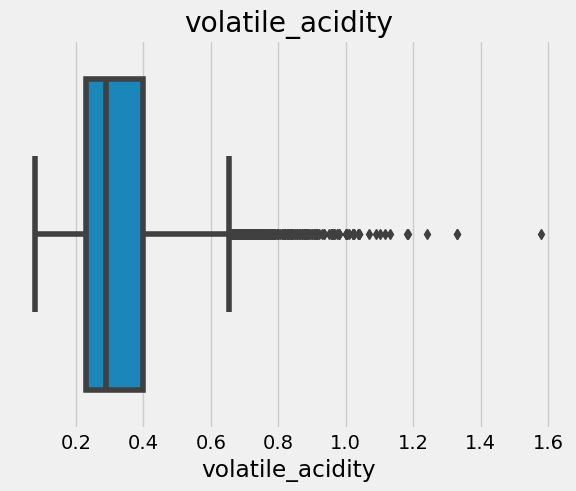

-------------------------------------------------------------


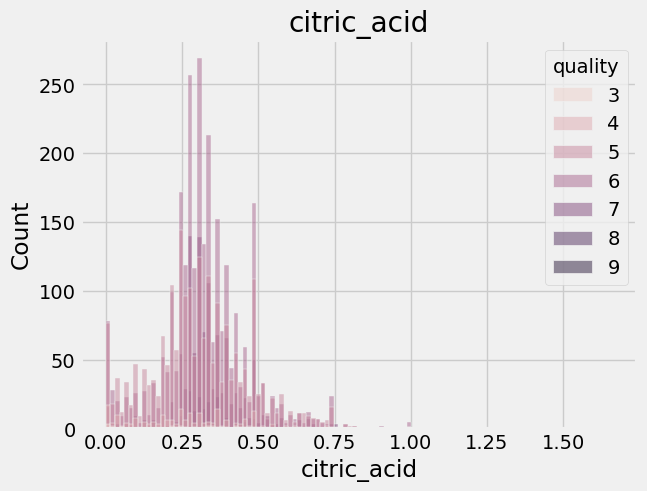

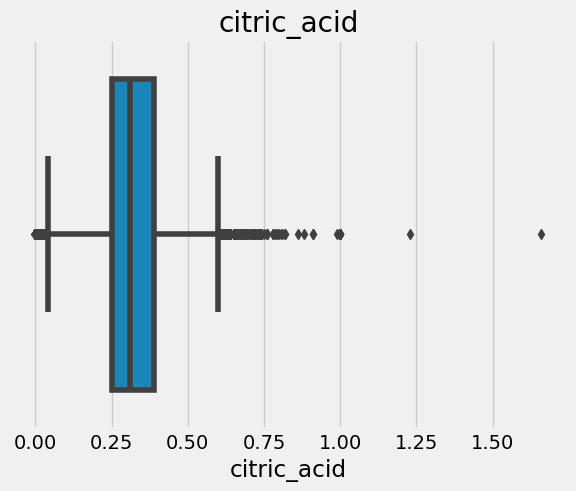

-------------------------------------------------------------


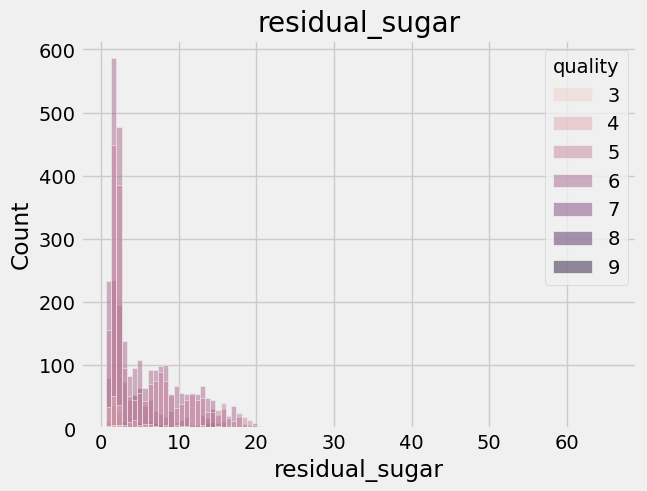

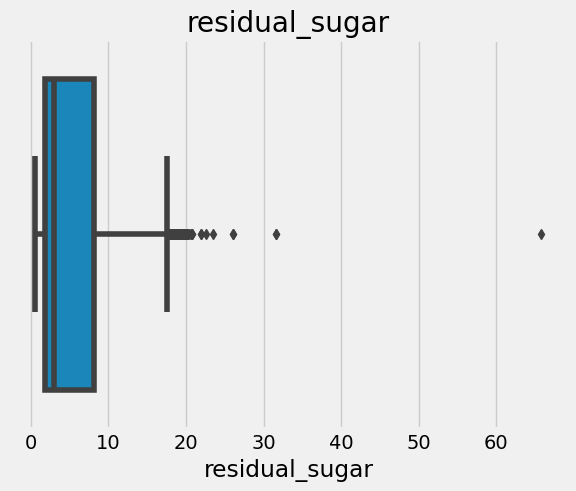

-------------------------------------------------------------


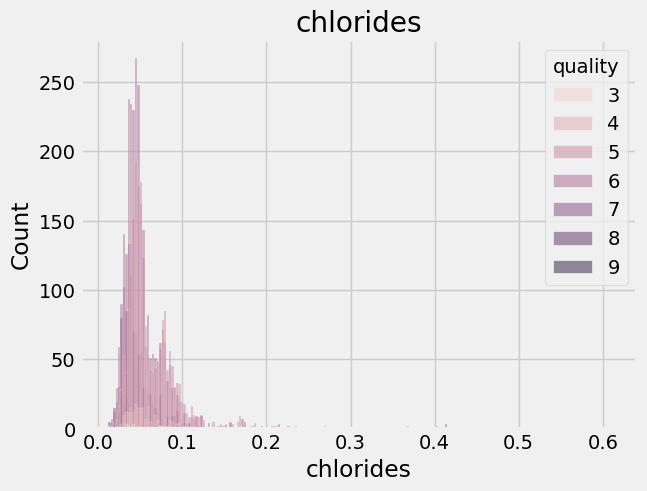

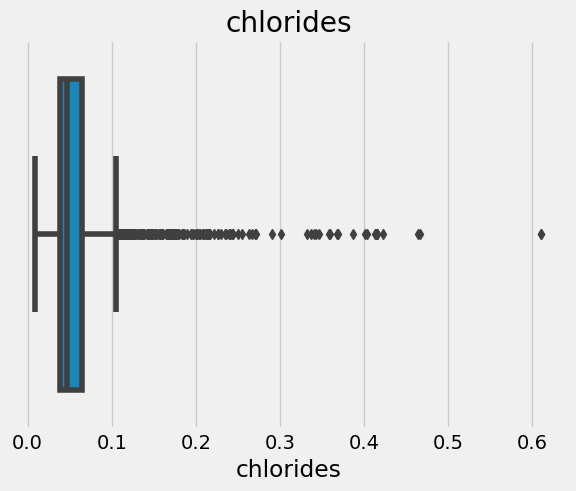

-------------------------------------------------------------


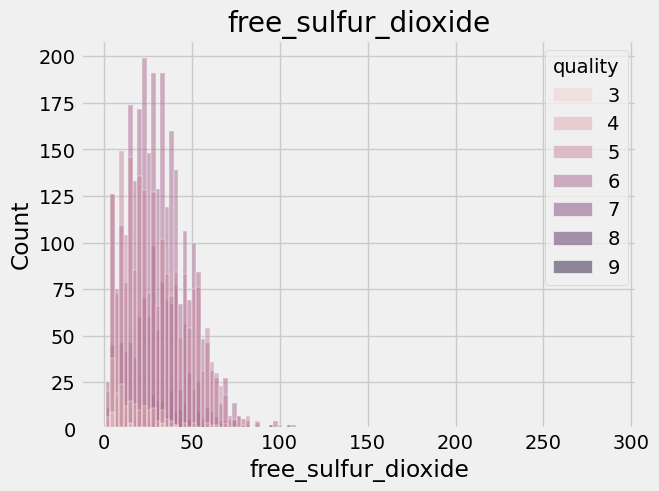

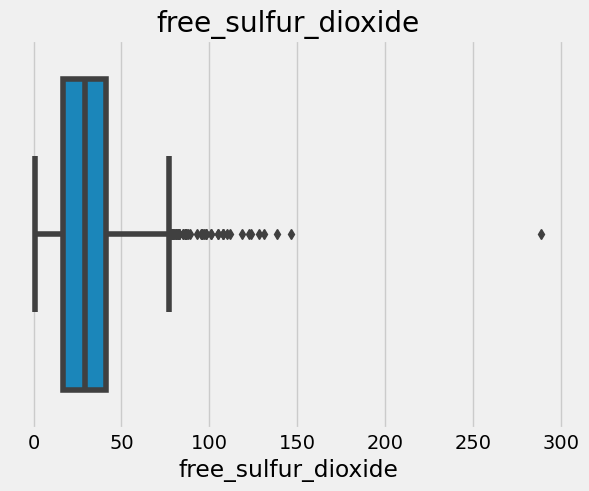

-------------------------------------------------------------


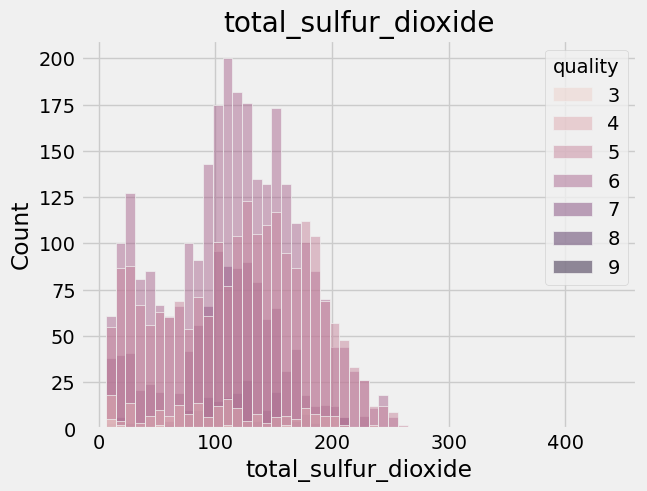

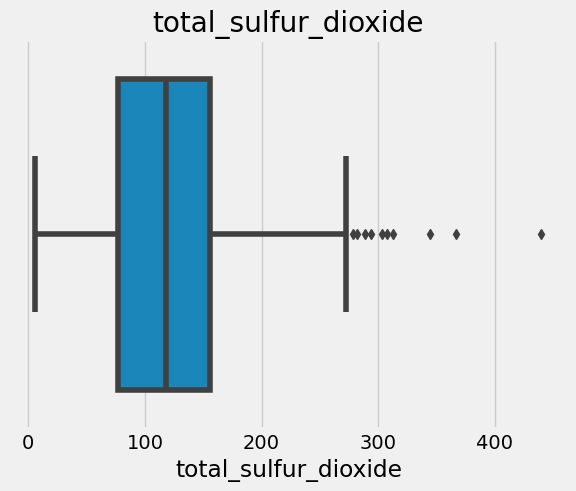

-------------------------------------------------------------


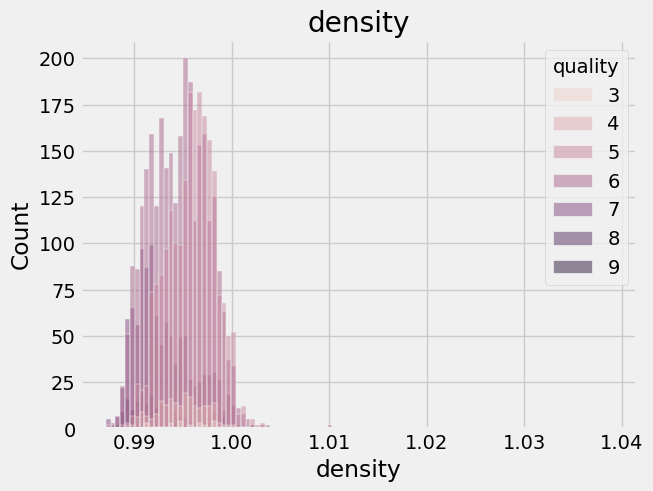

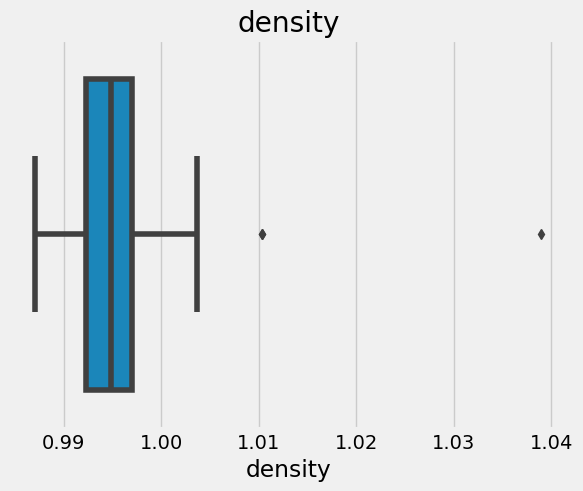

-------------------------------------------------------------


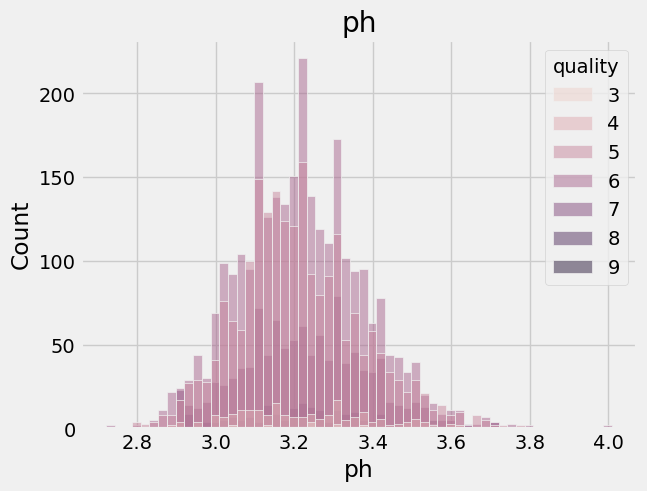

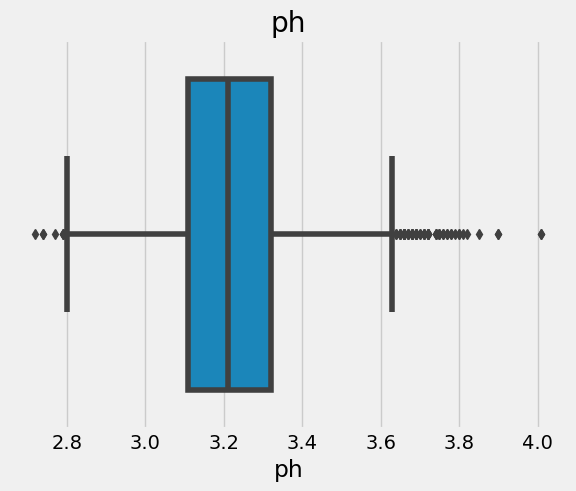

-------------------------------------------------------------


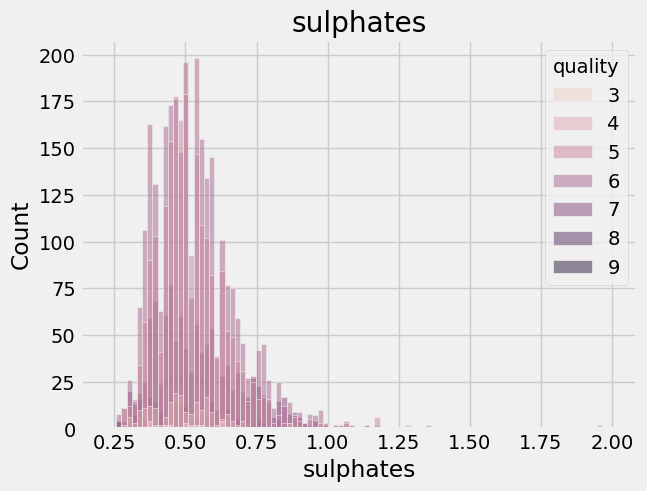

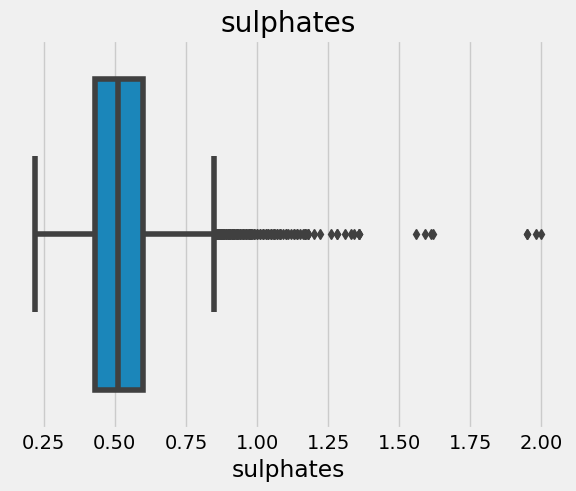

-------------------------------------------------------------


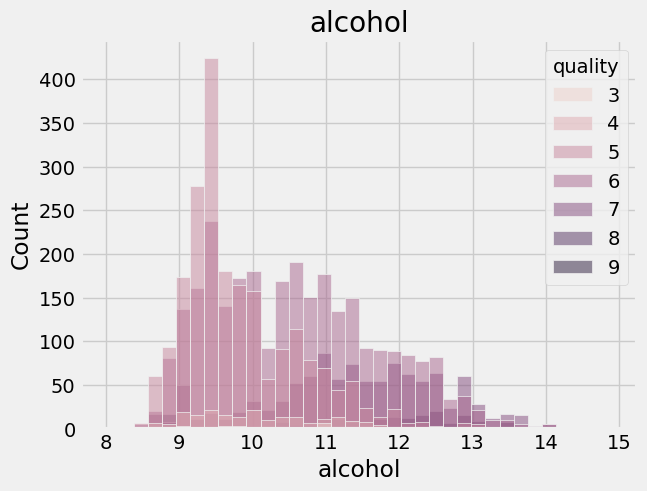

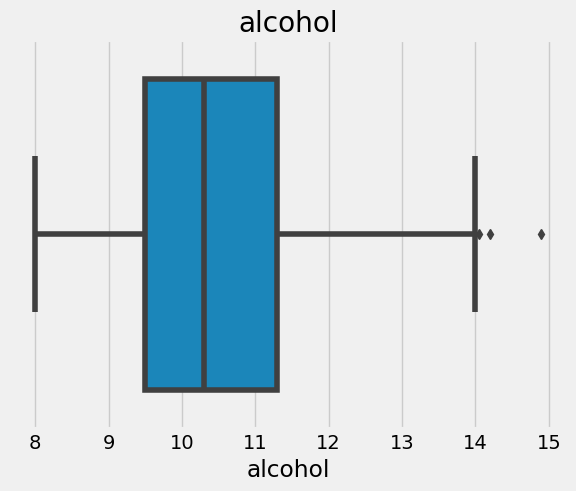

-------------------------------------------------------------


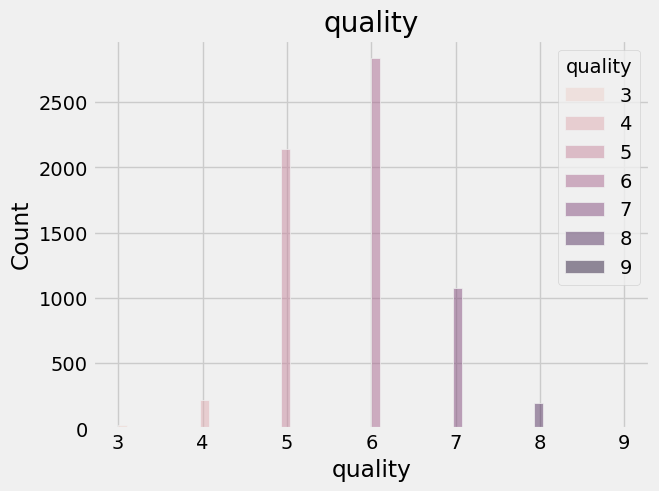

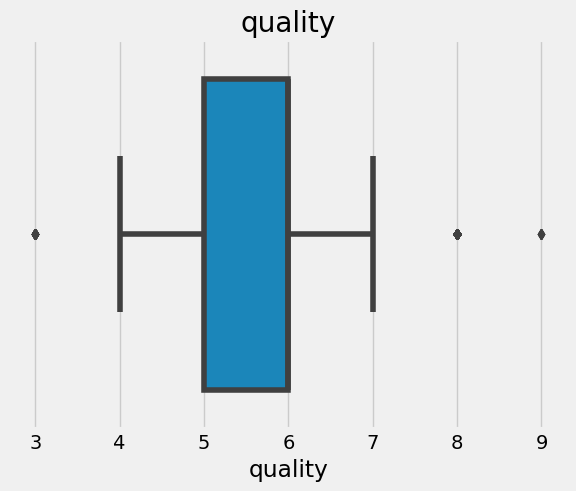

-------------------------------------------------------------


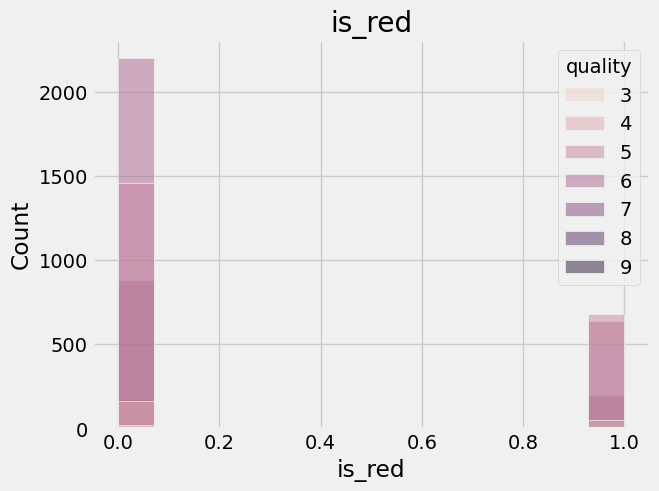

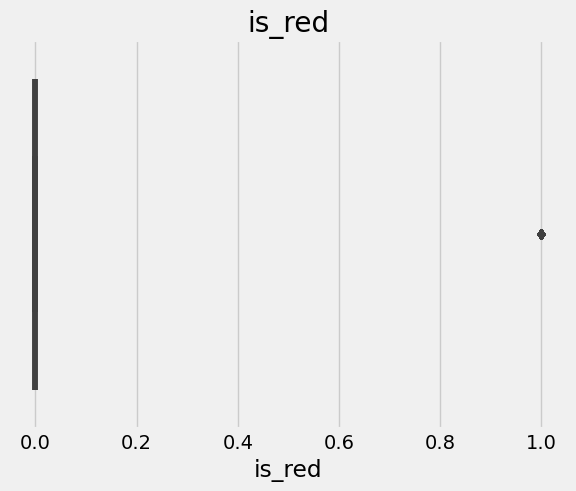

-------------------------------------------------------------


In [13]:
w.check_num_distribution(wine)

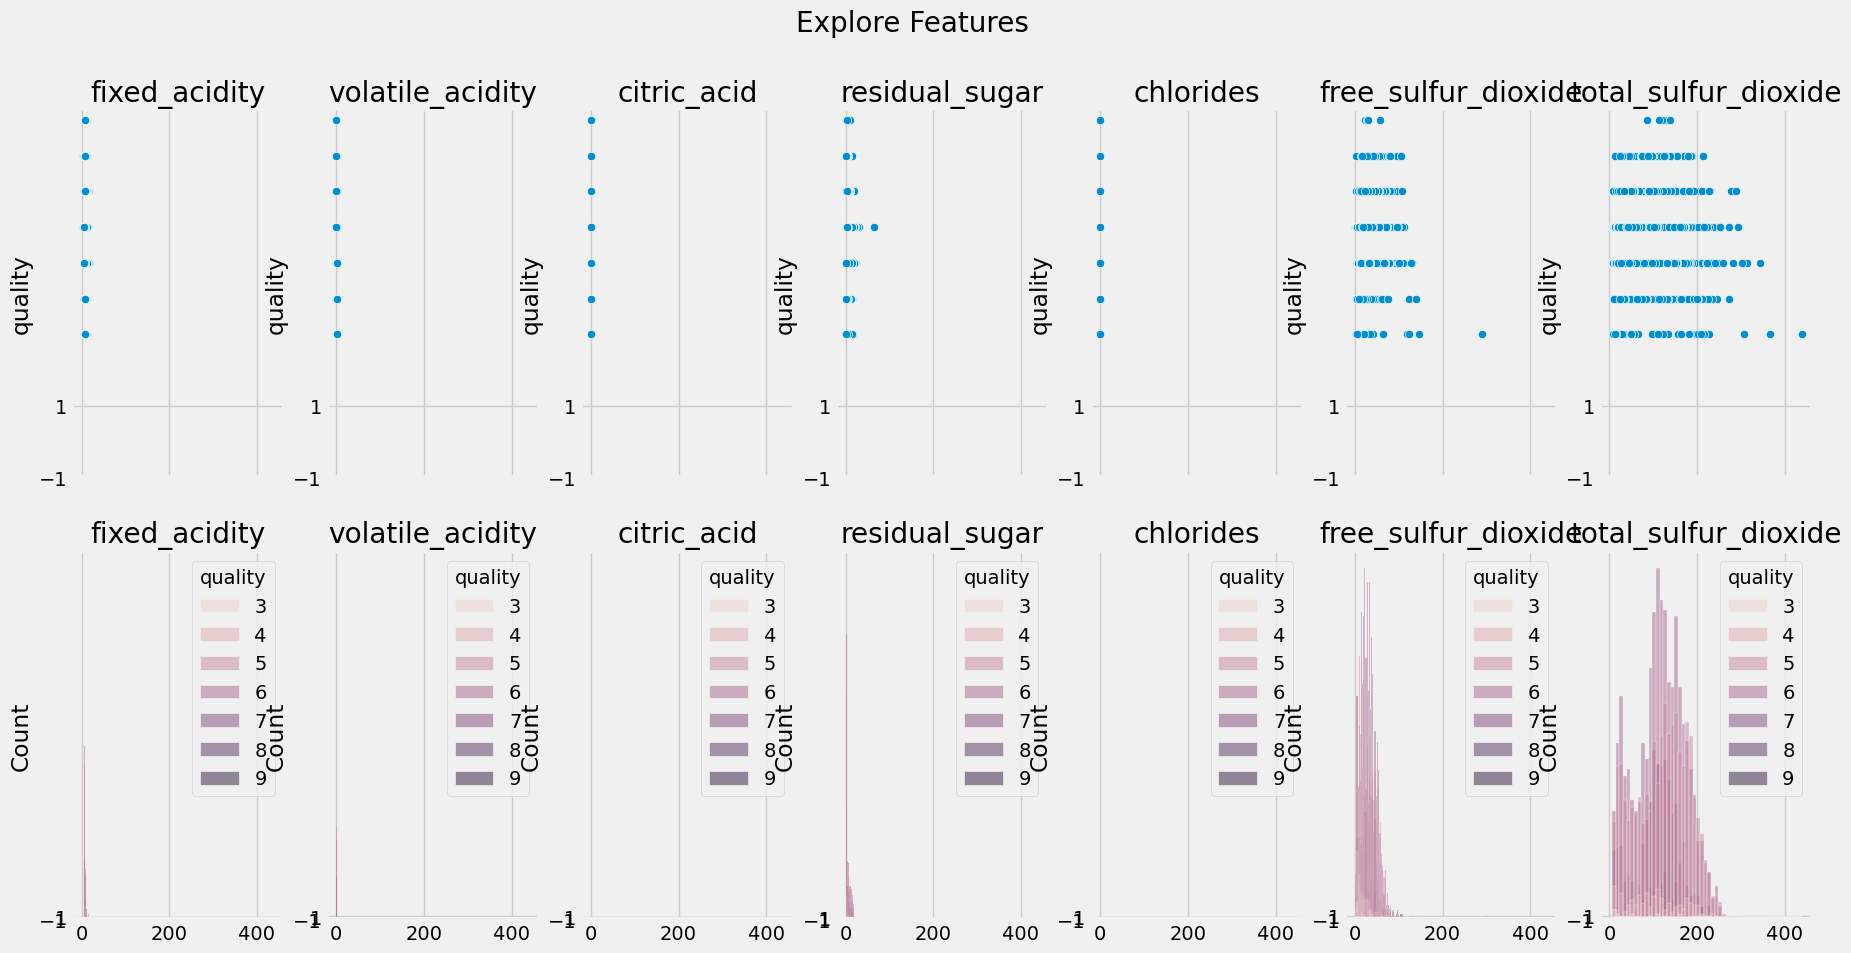

In [14]:
dimensions = (20,10)
fig, axs = plt.subplots(2,7, figsize=dimensions, sharex=True)
plt.suptitle('Explore Features',fontsize=20)
for ax, col in zip(axs[0], num_cols):
    sns.scatterplot(data=wine, x=col, y='quality', ax=ax)
    ax.set_yticks([-1,1])
    ax.set_xlabel(None)
    ax.set_title(label=col)
    #ax.legend(frameon=False)
for ax, col in zip(axs[1], num_cols):
    sns.histplot(data=wine, x=col, ax=ax, hue='quality')
    ax.set_yticks([-1,1])
    ax.set_xlabel(None)
    ax.set_title(label=col)

<Axes: xlabel='quality', ylabel='Count'>

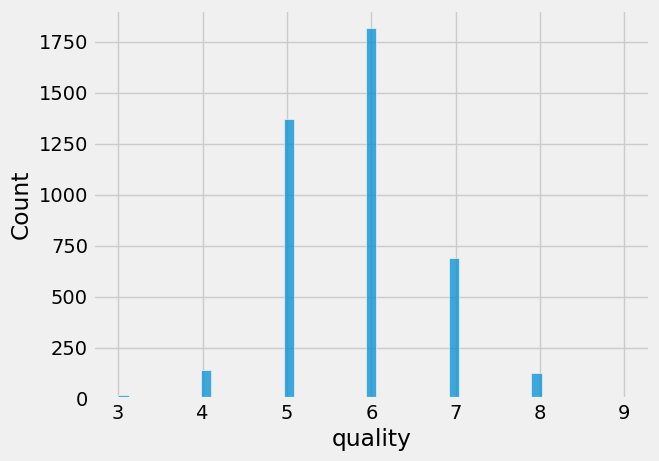

In [15]:
sns.histplot(data=train,x='quality')

<Figure size 1800x800 with 0 Axes>

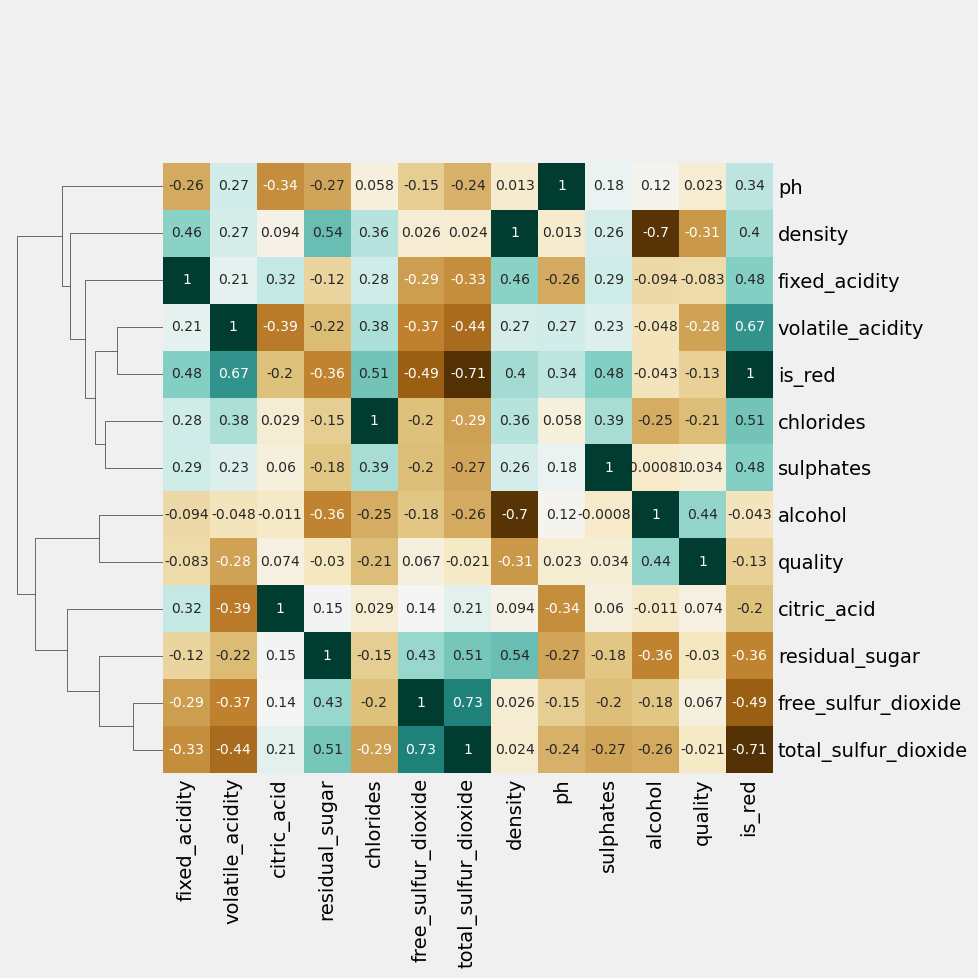

In [16]:
plt.figure(figsize=(18,8))
sns_plot = sns.clustermap(train.corr(),cmap = 'BrBG',annot=True,col_cluster=False,annot_kws={"fontsize":10})
sns_plot.cax.set_visible(False)
plt.title('Correlations Between Features')
plt.show()

## Correlation Findings

**total_sulfur_dioxide** -- strongest negative correlation to red wine

**volatile_acidity** -- strongest positive correlation to red wine

other features with weaker correlation to red are -- *fixed_acidity* **(+)**, *chlorides* **(+)**, *sulphates* **(+)**
*free_sulphure_dioxide* **(-)**

strongest driver of quality is -- *alcohol*

## Cluster

- sulphates / chlorides / is_red



## Hypothesis Testing for Features

In [17]:
e.check_correlation(train.volatile_acidity, train.quality)

NOT a normal distribution, spearman r
Reject the null hypothesis. There is a linear correlation.
        Spearman's r: -0.273704
        P-value: 2.496298974840307e-72


<Axes: xlabel='quality', ylabel='volatile_acidity'>

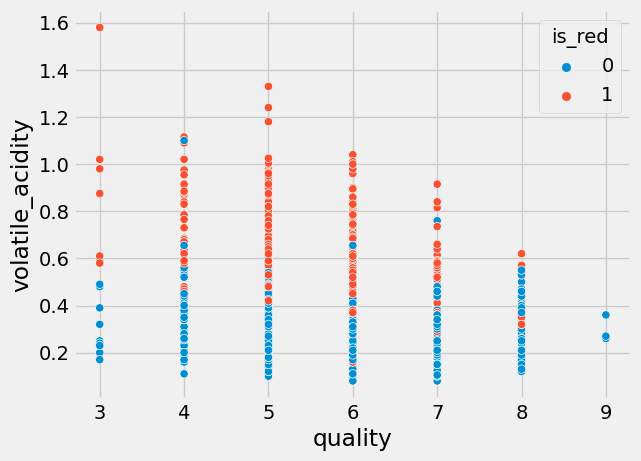

In [18]:
sns.scatterplot(data=train,x='quality',y='volatile_acidity',hue='is_red')

In [19]:
train.is_red.value_counts()

is_red
0    3101
1    1056
Name: count, dtype: int64

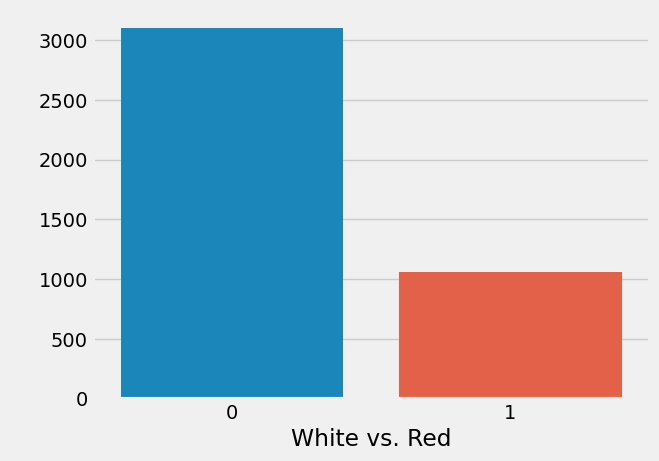

In [20]:
sns.countplot(data=train,x='is_red')
plt.xlabel('White vs. Red')
plt.ylabel(' ')
plt.show()

<Axes: xlabel='quality', ylabel='residual_sugar'>

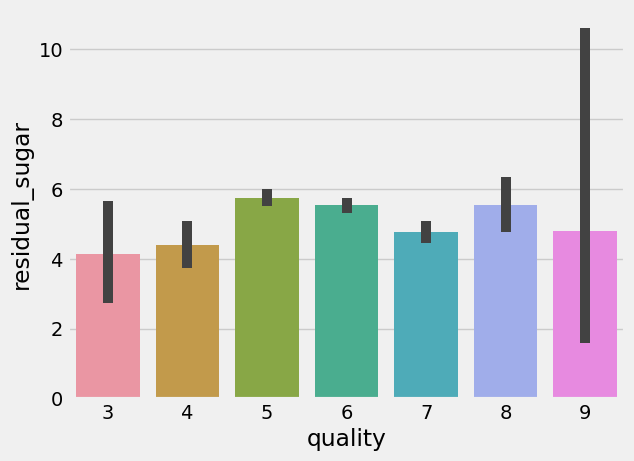

In [21]:
sns.barplot(data=train,x='quality', y='residual_sugar')

<Axes: xlabel='chlorides', ylabel='Count'>

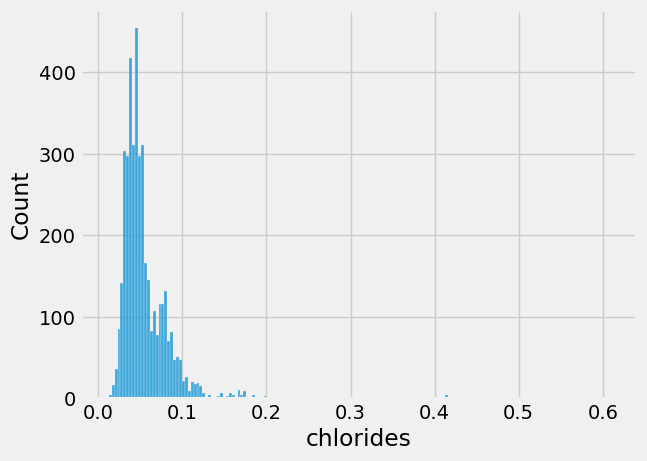

In [38]:
sns.histplot(data=x_train,x = 'chlorides')

In [23]:
km = KMeans(n_clusters=4)

wine_cluster = x_train_scaled[['chlorides','sulphates','is_red']]
wine_cluster_val = x_validate_scaled[['chlorides','sulphates','is_red']]
wine_cluster_test = x_test_scaled[['chlorides','sulphates','is_red']]
km.fit(wine_cluster)

KMeans(n_clusters=4)

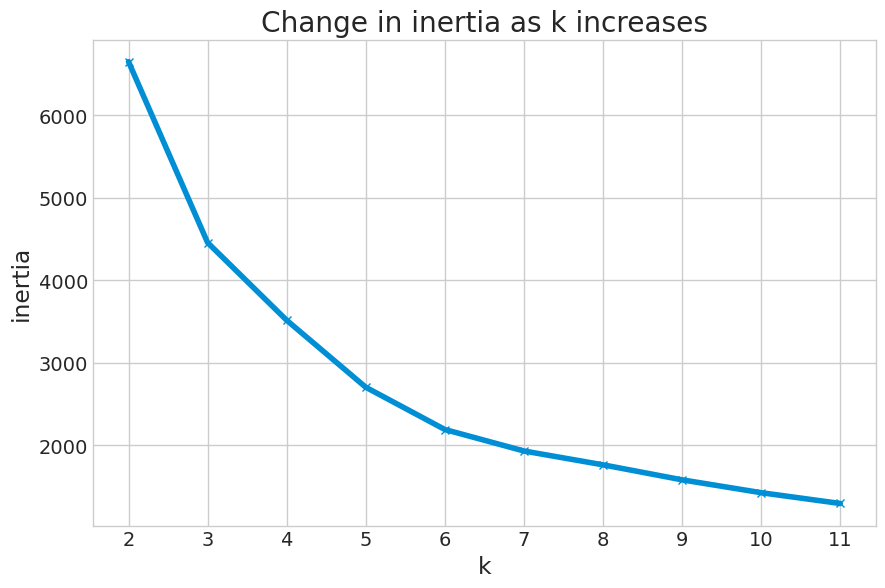

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(wine_cluster).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [25]:
# predicting for clusters
cluster_train = km.predict(wine_cluster)
cluster_validate = km.predict(wine_cluster_val)
cluster_test = km.predict(wine_cluster_test)

In [26]:
# adding our cluster feature to all dataframes

x_train['cluster_ch_sulf_red'] = cluster_train
x_validate['cluster_ch_sulf_red'] = cluster_validate
x_test['cluster_ch_sulf_red'] = cluster_test

x_train_scaled['cluster_ch_sulf_red'] = cluster_train
x_validate_scaled['cluster_ch_sulf_red'] = cluster_validate
x_test_scaled['cluster_ch_sulf_red'] = cluster_test



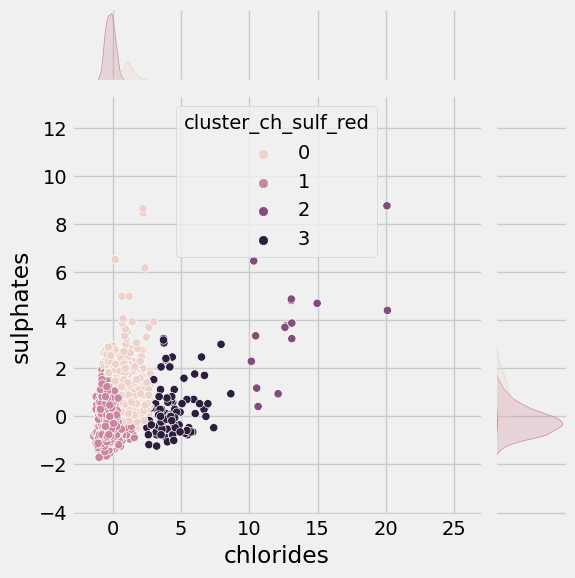

In [27]:
sns.jointplot(data=x_train_scaled, x ='chlorides', y='sulphates',hue='cluster_ch_sulf_red')

## RFE & KBest

In [28]:
m.rfe(x_train_scaled, x_train, y_train, model='lassolars', k=7)

['total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'is_red',
 'cluster_ch_sulf_red']

In [29]:
m.select_kbest(x_train_scaled,x_train, y_train, k=7)

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'chlorides',
 'density',
 'alcohol',
 'is_red']

## Modeling: Determining Baseline(s)

Using Mean for Regression Models\
           &\
Mode for Classification Models

In [30]:
y_train.value_counts()
# 6 occurs 1815 times / by the len(y_train will give )
baseline  = 1815/len(y_train)
print(f'Baseline: {baseline}')


Baseline: 0.43661294202549916


In [31]:
y_train.value_counts()

1815/len(y_train)

0.43661294202549916

## Modeling

### Features Selected: All

In [32]:
m.knn_compiled(x_train=x_train_scaled, y_train=y_train, x_validate=x_validate_scaled, y_validate=y_validate)

Best fit "n_neighbors" parameter (Determined by GridSearchCV): 16 
--------------------------------------
 0.542220910858095
0.5336538461538461


In [33]:
m.log_regression_compiled(x_train=x_train_scaled, y_train=y_train, x_validate=x_validate_scaled, y_validate=y_validate)

Best fit "C" parameter (Determined by GridSearchCV): 3.4000000000000004
0.5326923076923077


## Modeling: Tighten Features
- total_sulfur_dioxide
- volatile_acidity
- fixed_acidity
- alcohol
- free_sulfur_dioxide
- cluster_ch_sulph_red

In [34]:
x_test_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,is_red,cluster_ch_sulf_red
0,-0.384615,-0.611111,-1.500000,-0.269841,-0.071429,-0.24,-0.134146,-0.279221,0.380952,-0.352941,-0.166667,0.0,1
1,1.769231,2.638889,-0.285714,-0.031746,1.071429,-0.20,-0.756098,0.738095,0.476190,0.941176,0.166667,1.0,0
2,-1.000000,-0.444444,-0.428571,-0.301587,0.071429,2.72,0.695122,-0.865801,1.095238,0.647059,0.444444,0.0,1
3,0.000000,1.055556,1.285714,0.412698,0.428571,-0.12,0.036585,0.521645,0.619048,1.470588,0.111111,1.0,0
4,-0.461538,-0.833333,0.928571,-0.285714,-0.178571,1.52,0.390244,-0.928571,-0.333333,1.294118,0.500000,0.0,1


In [35]:
x_train_m2 = x_train_scaled[['total_sulfur_dioxide','volatile_acidity','fixed_acidity', 'free_sulfur_dioxide', 'alcohol','cluster_ch_sulf_red']]
x_validate_m2 = x_validate_scaled[['total_sulfur_dioxide','volatile_acidity','fixed_acidity', 'free_sulfur_dioxide', 'alcohol','cluster_ch_sulf_red']]
x_test_m2 = x_test_scaled[['total_sulfur_dioxide','volatile_acidity','fixed_acidity', 'free_sulfur_dioxide', 'alcohol','cluster_ch_sulf_red']]

In [36]:
m.knn_compiled(x_train=x_train_m2, y_train=y_train, x_validate=x_validate_m2, y_validate=y_validate)

Best fit "n_neighbors" parameter (Determined by GridSearchCV): 17 
--------------------------------------
 0.54029523049153
0.5413461538461538


In [37]:
m.log_regression_compiled(x_train=x_train_m2, y_train=y_train, x_validate=x_validate_m2, y_validate=y_validate)

Best fit "C" parameter (Determined by GridSearchCV): 0.1
0.5365384615384615
